# Session #3
- Various sampling techniques
- Brief intro to plots in python
- Emperically confirm the central limit theorem

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
SEED = 7
np.random.seed(SEED)

In [3]:
PATH = "https://gist.githubusercontent.com/slopp/\
ce3b90b9168f2f921784de84fa445651/raw/\
4ecf3041f0ed4913e7c230758733948bc561f434/penguins.csv"

In [4]:
df = pd.read_csv(PATH, header=0)
df = df.dropna().reset_index(drop=True)

In [5]:
df.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
4,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [6]:
len(df)

333

In [7]:
df.species.value_counts(normalize=True)

Adelie       0.438438
Gentoo       0.357357
Chinstrap    0.204204
Name: species, dtype: float64

# Random sample

In [8]:
random_sample = df.sample(n=50, random_state=SEED)
print(len(random_sample))
print(random_sample.species.value_counts(normalize=True))

50
Adelie       0.44
Gentoo       0.30
Chinstrap    0.26
Name: species, dtype: float64


In [9]:
random_sample = df.sample(frac=0.2, random_state=SEED)
print(len(random_sample))
print(random_sample.species.value_counts(normalize=True))

67
Adelie       0.417910
Gentoo       0.328358
Chinstrap    0.253731
Name: species, dtype: float64


# Stratified sample (proportionate)

In [10]:
strat_sample = df.groupby("species").apply(
    lambda x: x.sample(frac=0.2, random_state=SEED))
strat_sample = strat_sample.droplevel(0).reset_index(drop=True)

strat_sample.species.value_counts(normalize=True)

Adelie       0.432836
Gentoo       0.358209
Chinstrap    0.208955
Name: species, dtype: float64

# Stratified sample (disproportionate)

In [11]:
strat_sample = df.groupby("species").apply(
    lambda x: x.sample(n=10, random_state=SEED))
strat_sample = strat_sample.droplevel(0).reset_index(drop=True)

strat_sample.species.value_counts(normalize=True)

Adelie       0.333333
Chinstrap    0.333333
Gentoo       0.333333
Name: species, dtype: float64

# Systematic sampling

In [12]:
N = len(df)
n = 10
k = N // n

# Select a random number from the first k indices.
start = int(np.random.uniform(low=0, high=k))

# Sort the data before sampling.
systematic_sample = df.sort_values(by="body_mass_g").iloc[start::k]

# Weighted sampling
Draw 20% of the total rows where Chinstraps are three times more likely than the other two species.

In [13]:
condition = df.species == "Chinstrap"
weights = np.where(condition, 3, 1)
sample_weighted = df.sample(frac=0.2, weights=weights)

sample_weighted.species.value_counts(normalize=True)

Chinstrap    0.388060
Gentoo       0.343284
Adelie       0.268657
Name: species, dtype: float64

# Cluster sampling

In [14]:
# create 10 bins using the body_mass_g column
num_clusters = 10
clusters = pd.cut(df.body_mass_g, 10, labels=False)

# select 1st, 3rd and 5th bins
chosen_clusters = [1, 3, 5]
df["clusters"] = clusters
df_chosen = df[clusters.isin(chosen_clusters)]

# Take stratified samples from these clusters
sample_cluster = df_chosen.groupby("clusters").apply(
    lambda x: x.sample(frac=0.2, random_state=SEED))
sample_cluster = sample_cluster.droplevel(0).reset_index(drop=True)

# Drop the extra column
df.drop("clusters", axis=1, inplace=True)
sample_cluster.drop("clusters", axis=1, inplace=True)

# Plots

In [15]:
# The default python visualization library
import matplotlib.pyplot as plt
# Built on top of matplotlib. Aesthetically pleasing.
import seaborn as sns
# Follow seaborn's visualization's style.
sns.set()

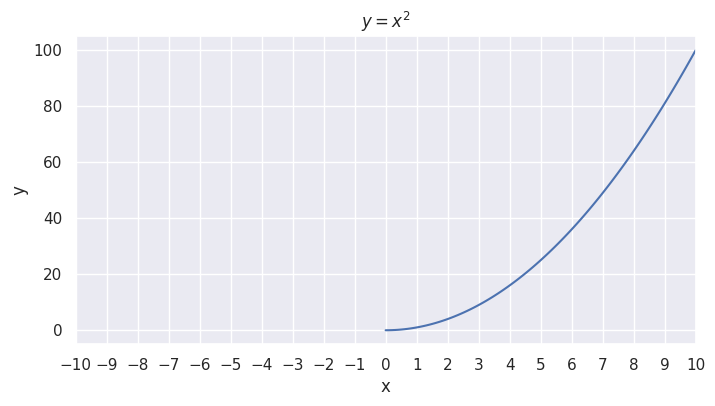

In [16]:
x = np.linspace(0, 10, 100)
y = x ** 2

# Create a space for the plot.
figure = plt.figure(figsize=(8, 4))

# Plot the data.
plt.plot(x, y)

# Set the title
plt.title("$y = x^2$")
plt.xlabel("x")
plt.ylabel("y")

# Set the x-axis limits.
plt.xlim(-10, 10)

# Set the x-axis markings.
plt.xticks(np.arange(-10, 11, 1))

# Render the plot.
plt.show()

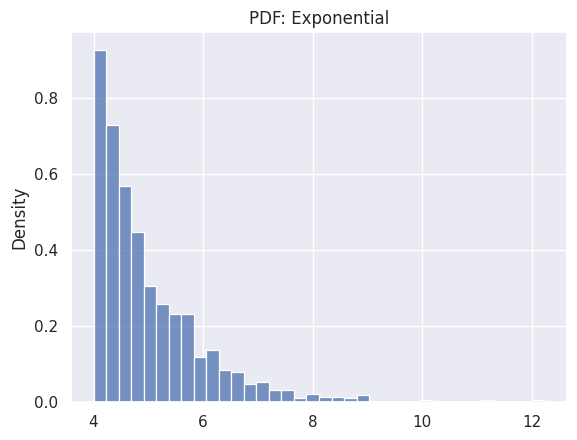

In [17]:
dist = stats.expon(4)
rvs = dist.rvs(1000)

# Automatically bins the data.
# Check the documentation for the "stat" parameter
sns.histplot(rvs, stat="density")
plt.title("PDF: Exponential")
plt.show()

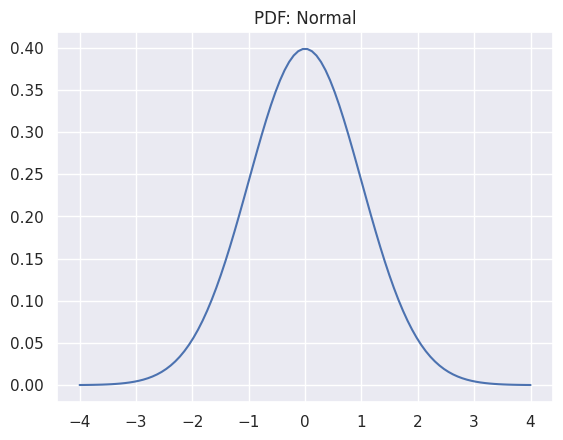

In [18]:
norm = stats.norm(loc=0, scale=1)

x = np.linspace(-4, 4, 100)
y = norm.pdf(x)

plt.plot(x, y)
plt.title("PDF: Normal")
plt.show()

# Emperically verify Central limit theorem
- Take any distribution.
- multiple samples
- each sample is of a decent size
- The distribution of the sample means is gaussian
- standardize the mean distribution -> Standard normal distribution

## Exponential

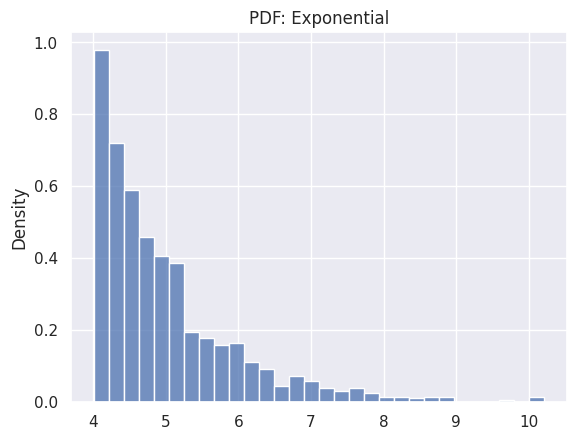

In [19]:
dist = stats.expon(4)

sns.histplot(dist.rvs(1000), stat="density")
plt.title("PDF: Exponential")
plt.show()

In [20]:
num_samples = 1000
sample_size = 50

sample_means = []

for i in range(num_samples):
    sample = dist.rvs(sample_size)
    sample_means.append(sample.mean())

sample_means = np.array(sample_means)

In [21]:
sample_mean = sample_means.mean()
sample_std = sample_means.std()

# Besse'l correction
N = len(sample_means)
sample_std = sample_std * np.sqrt(N / (N - 1))

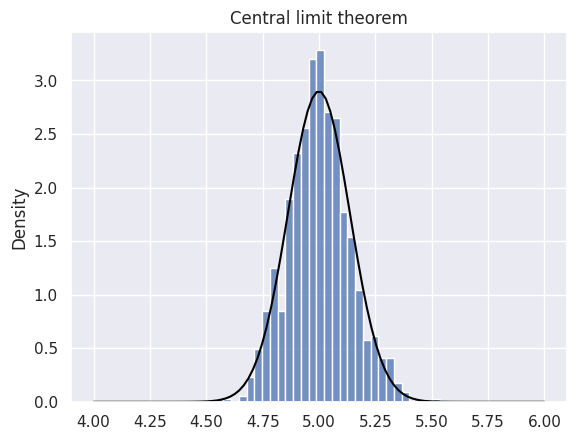

In [22]:
sns.histplot(sample_means, stat="density")

norm = stats.norm(loc=sample_mean, scale=sample_std)
x = np.linspace(4, 6, 100)
y = norm.pdf(x)

plt.plot(x, y, color="black")
plt.title("Central limit theorem")
plt.show()

## Standardised

In [23]:
# Normalize the means.
sample_means = (sample_means - sample_mean) / sample_std

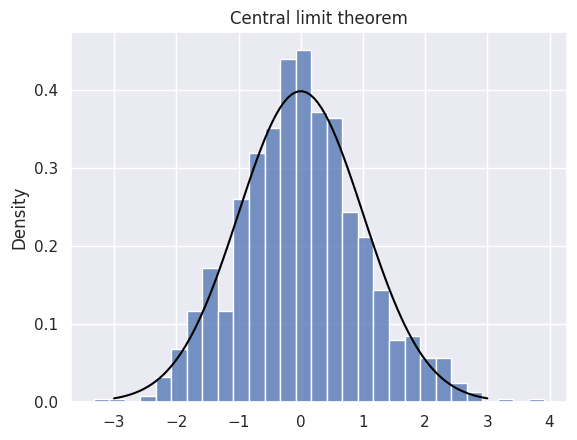

In [24]:
sns.histplot(sample_means, stat="density")

norm = stats.norm(loc=0, scale=1)
x = np.linspace(-3, 3, 100)
y = norm.pdf(x)

plt.plot(x, y, color="black")
plt.title("Central limit theorem")
plt.show()

## Poisson

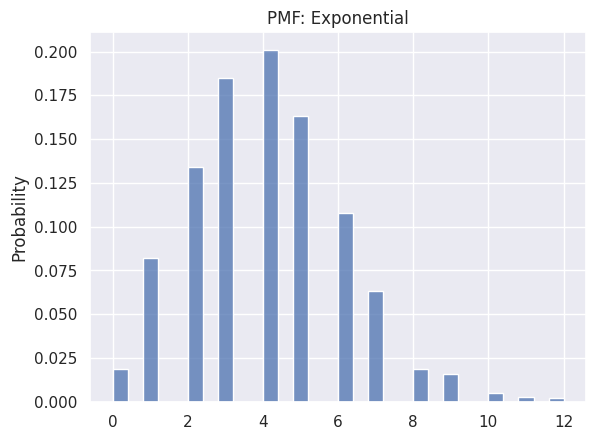

In [26]:
dist = stats.poisson(4)

sns.histplot(dist.rvs(1000), stat="probability")
plt.title("PMF: Exponential")
plt.show()

In [27]:
num_samples = 1000
sample_size = 50

sample_means = []

for i in range(num_samples):
    sample = dist.rvs(sample_size)
    sample_means.append(sample.mean())

sample_means = np.array(sample_means)

In [28]:
sample_mean = sample_means.mean()
sample_std = sample_means.std()

# Besse'l correction
N = len(sample_means)
sample_std = sample_std * np.sqrt(N / (N - 1))

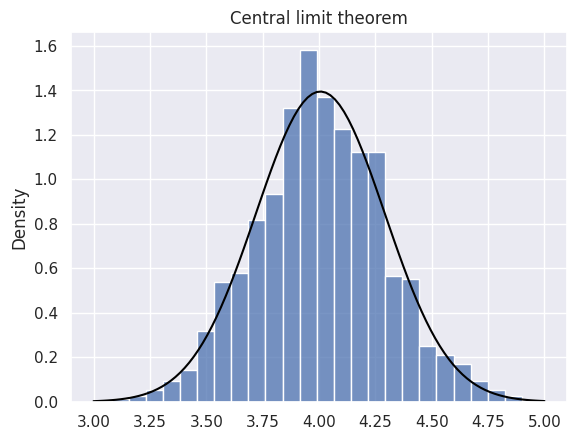

In [32]:
sns.histplot(sample_means, stat="density")

norm = stats.norm(loc=sample_mean, scale=sample_std)
x = np.linspace(3, 5, 100)
y = norm.pdf(x)

plt.plot(x, y, color="black")
plt.title("Central limit theorem")
plt.show()

## Standardised

In [33]:
# Normalize the means.
sample_means = (sample_means - sample_mean) / sample_std

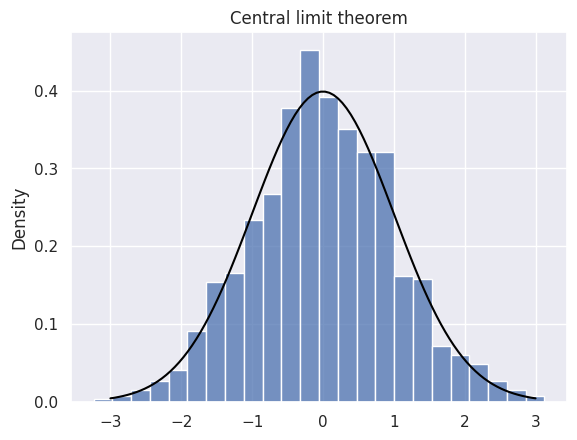

In [34]:
sns.histplot(sample_means, stat="density")

norm = stats.norm(loc=0, scale=1)
x = np.linspace(-3, 3, 100)
y = norm.pdf(x)

plt.plot(x, y, color="black")
plt.title("Central limit theorem")
plt.show()